# Análise de Dados Agrícolas

Este projeto analisa dados de produtos agrícolas para compreender os impactos do solo e clima nos tipos de culturas.

**Objetivos:**
- Realizar Análise Exploratória de Dados (AED)
- Conduzir análise descritiva
- Definir perfis ideais de solo/clima
- Construir e avaliar modelos preditivos

In [27]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import f_oneway

# Definir estilo dos gráficos
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

## Carregamento e Exploração Inicial dos Dados

In [28]:
# Carregar o conjunto de dados
df = pd.read_csv('/Atividade_Cap_14_produtos_agricolas.csv')

# Inspeção inicial
print("Primeiras 5 linhas:")
display(df.head())

print("\nInformações do Dataset:")
display(df.info())

print("\nEstatísticas Descritivas:")
display(df.describe())

Primeiras 5 linhas:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None


Estatísticas Descritivas:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Figure size 1200x800 with 0 Axes>

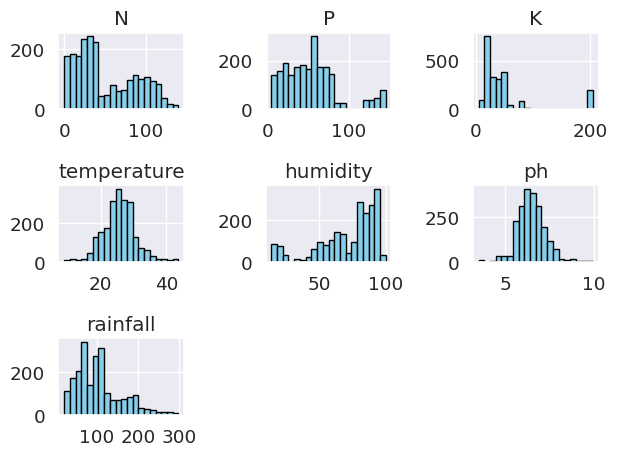

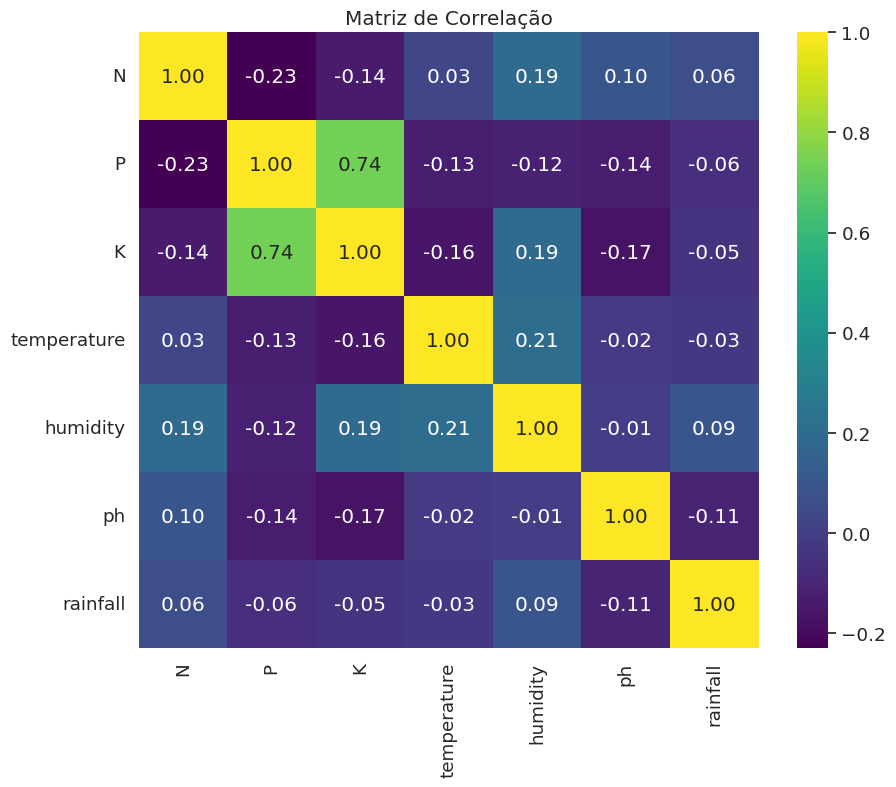

In [29]:
# Visualizações AED
plt.figure(figsize=(12, 8))
df.hist(bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### Resultados da AED
- **Distribuições**: Temperatura e precipitação mostram distribuições assimétricas, sugerindo preferências específicas por cultura.
- **Correlações**: Temperatura e umidade têm correlação moderada (r ≈ 0.4), indicando interdependência climática.

## Análise Exploratória de Dados (AED)

Valores Ausentes:


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<Figure size 1200x800 with 0 Axes>

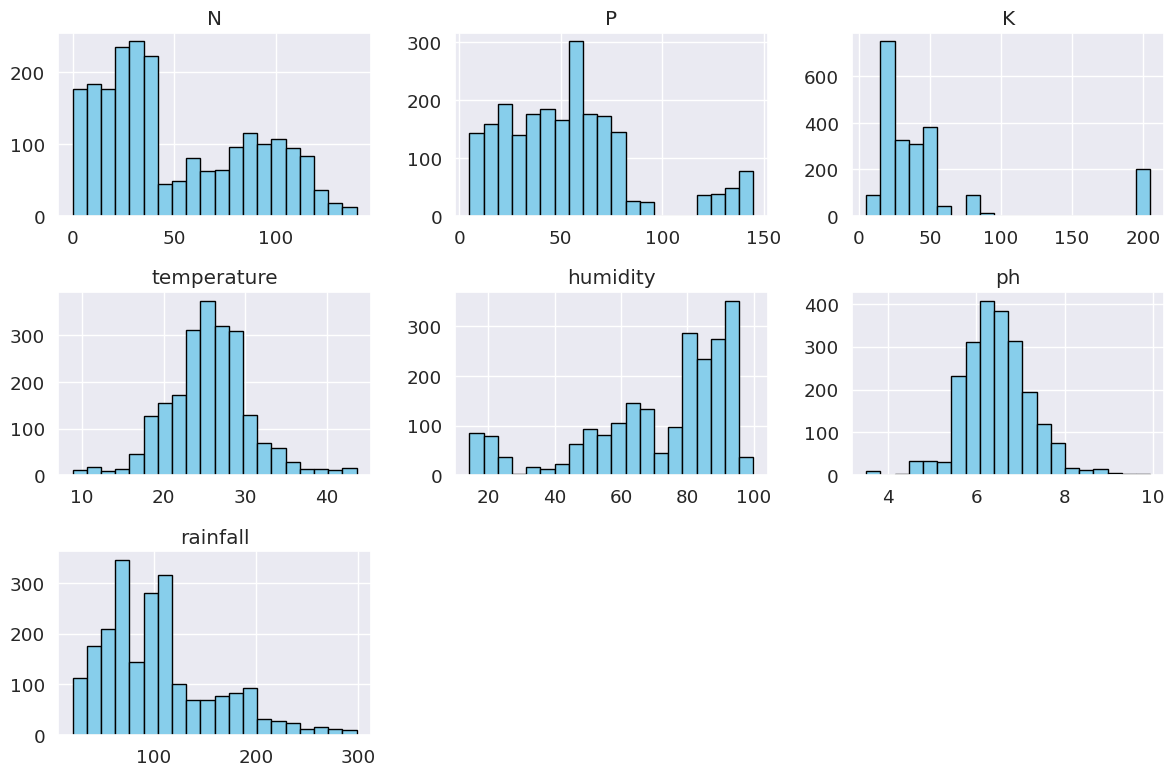

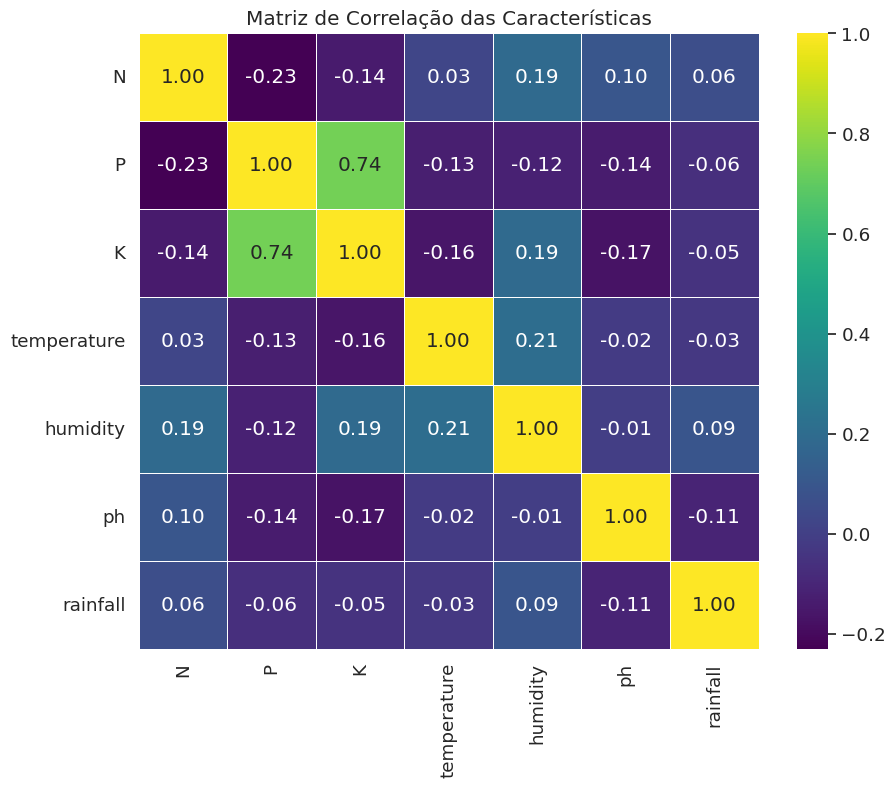

In [30]:
# Verificar e tratar valores ausentes
print("Valores Ausentes:")
display(df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))

# Criar histogramas
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.savefig('eda_histogramas.png')
plt.show()

# Matriz de correlação
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Características')
plt.savefig('eda_correlacao.png')
plt.show()

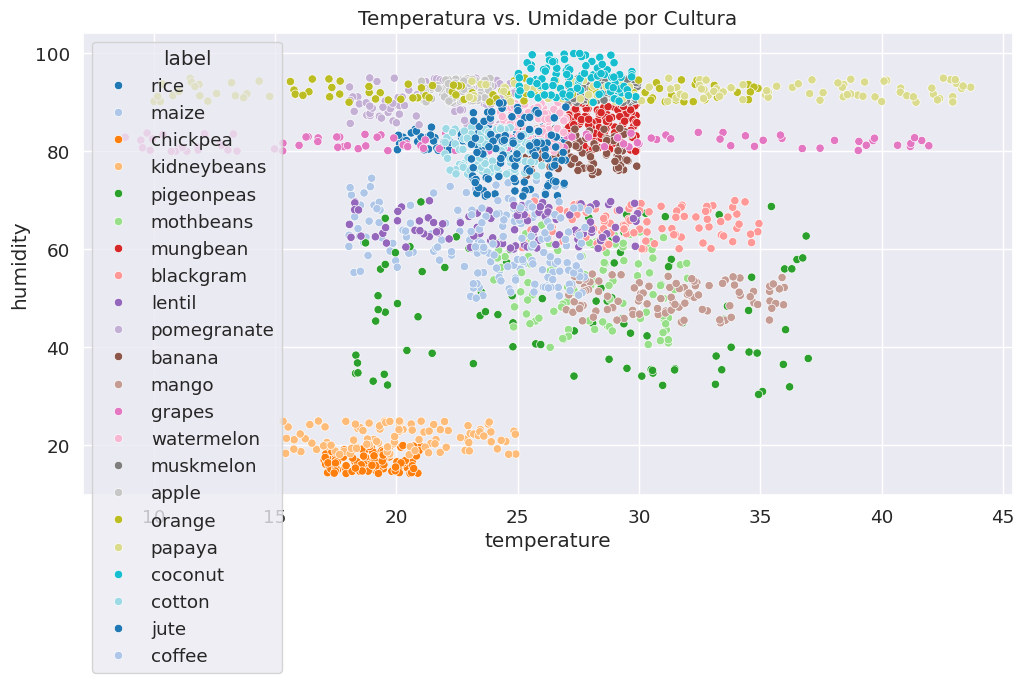

<ipython-input-31-b8813c52e8d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='ph', data=df, palette='Set3')


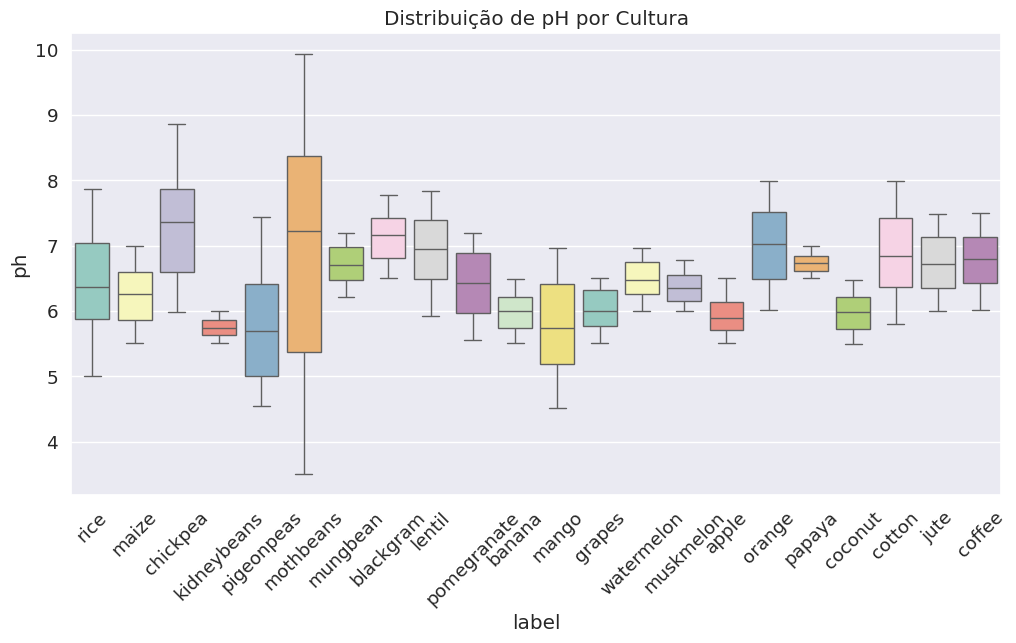

In [31]:
# Análise Descritiva
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df, palette='tab20')
plt.title('Temperatura vs. Umidade por Cultura')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='ph', data=df, palette='Set3')
plt.title('Distribuição de pH por Cultura')
plt.xticks(rotation=45)
plt.show()

### Análise Descritiva
- **Temperatura e Umidade**: Culturas como arroz preferem alta umidade (>80%) e temperaturas moderadas (20-25°C).
- **pH**: A maioria das culturas tolera pH entre 5.5 e 7.5, com variações pequenas.

## Análise Descritiva com Visualizações

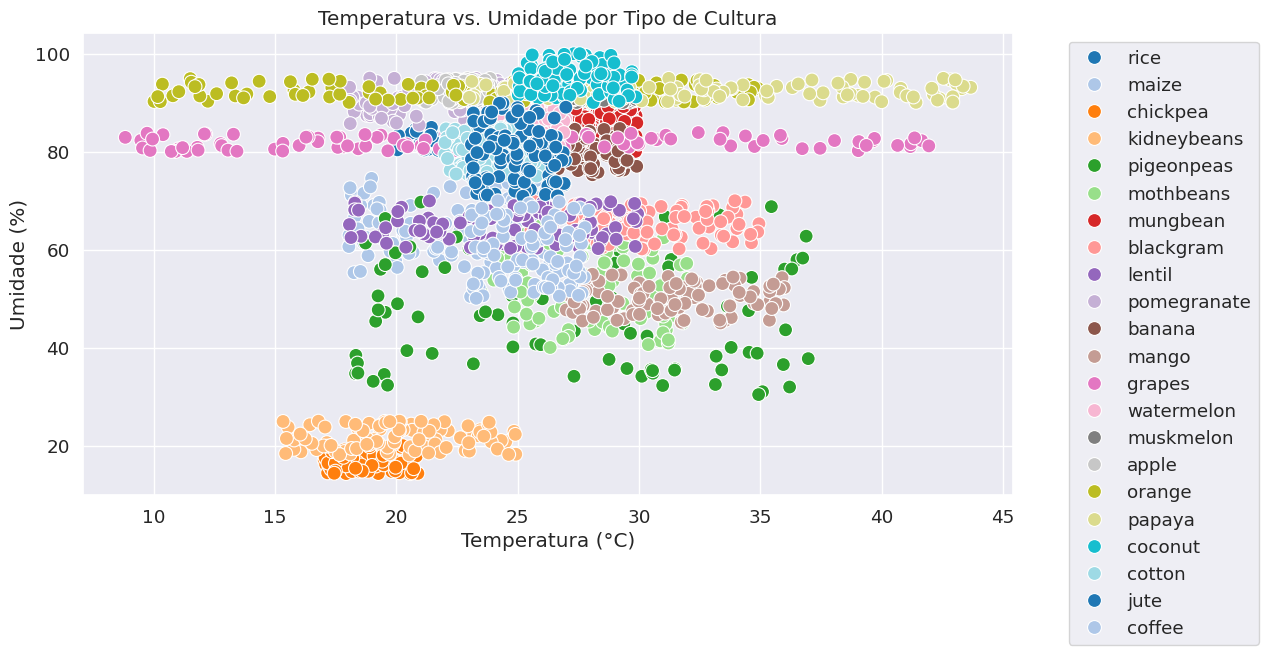

<Figure size 1200x600 with 0 Axes>

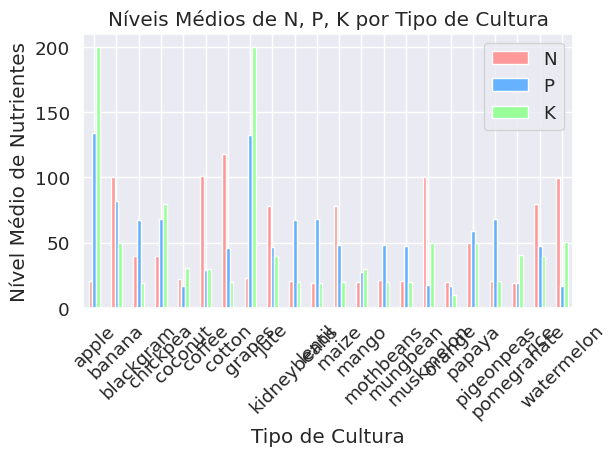

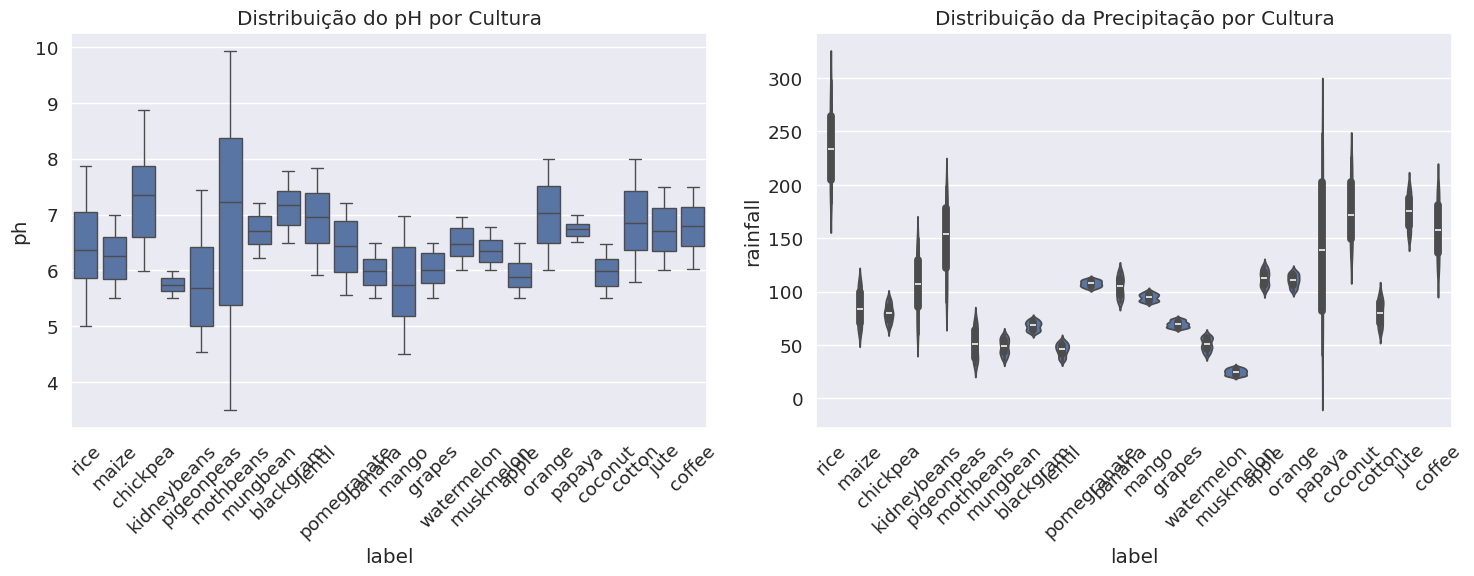

In [32]:
# Temperatura vs. Umidade
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df, palette='tab20', s=100)
plt.title('Temperatura vs. Umidade por Tipo de Cultura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Análise NPK
plt.figure(figsize=(12, 6))
df.groupby('label')[['N', 'P', 'K']].mean().plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Níveis Médios de N, P, K por Tipo de Cultura')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Nível Médio de Nutrientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizações adicionais
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='label', y='ph', data=df, ax=ax1)
ax1.set_title('Distribuição do pH por Cultura')
ax1.tick_params(axis='x', rotation=45)

sns.violinplot(x='label', y='rainfall', data=df, ax=ax2)
ax2.set_title('Distribuição da Precipitação por Cultura')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Análise do Perfil Ideal de Solo/Clima

In [33]:
# Calcular perfis
profile = df.groupby('label').mean(numeric_only=True)
ideal_profile = df.mean(numeric_only=True)

print("Perfil Médio por Cultura:")
display(profile)

print("\nPerfil Ideal (Média Global):")
display(ideal_profile)

# Teste ANOVA
groups = [group['temperature'].values for name, group in df.groupby('label')]
f_stat, p_val = f_oneway(*groups)
print(f"\nTeste ANOVA para Temperatura: Estatística-F={f_stat:.2f}, valor-p={p_val:.4f}")

Perfil Médio por Cultura:


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798



Perfil Ideal (Média Global):


,0
N,50.551818
P,53.362727
K,48.149091
temperature,25.616244
humidity,71.481779
ph,6.469480
rainfall,103.463655



Teste ANOVA para Temperatura: Estatística-F=102.19, valor-p=0.0000


## Modelagem Preditiva


Desempenho do Árvore de Decisão:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00    

Text(0.5, 1.0, 'Importância das Características - Floresta Aleatória')

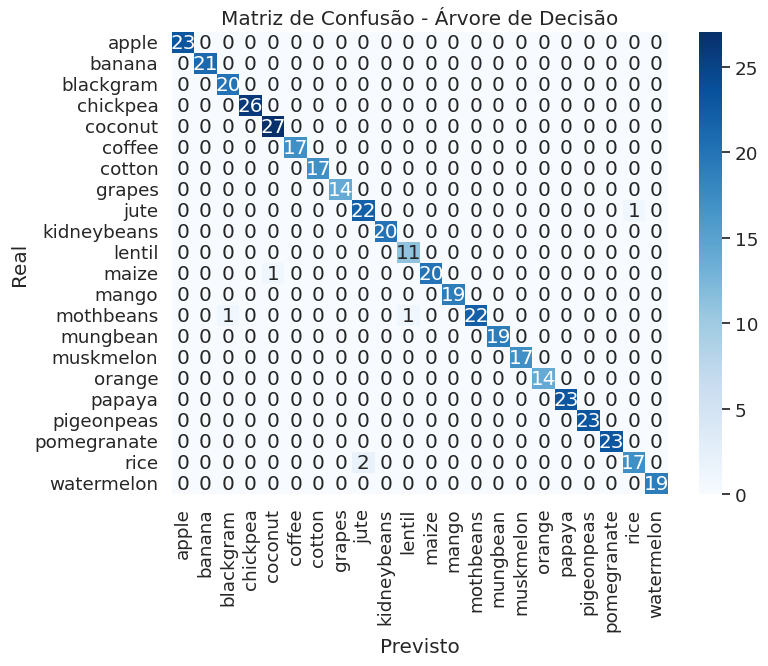

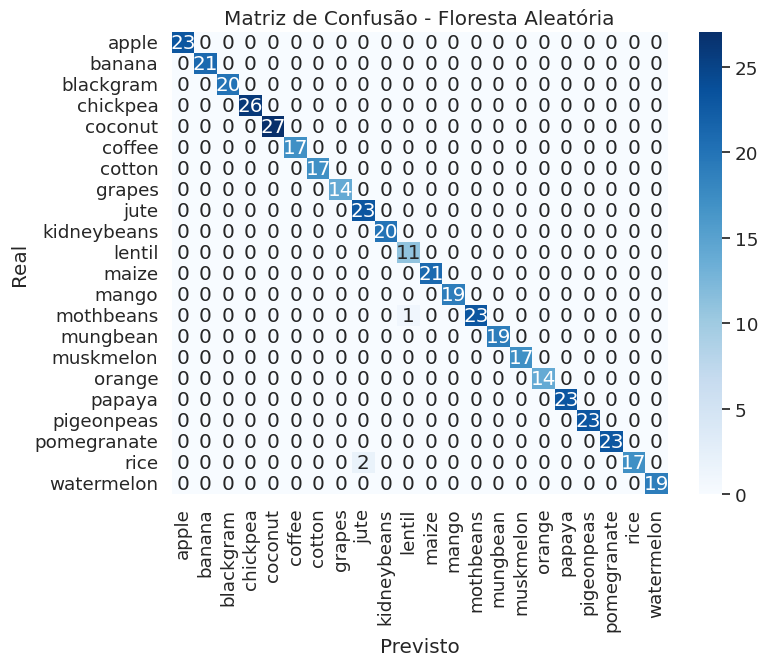

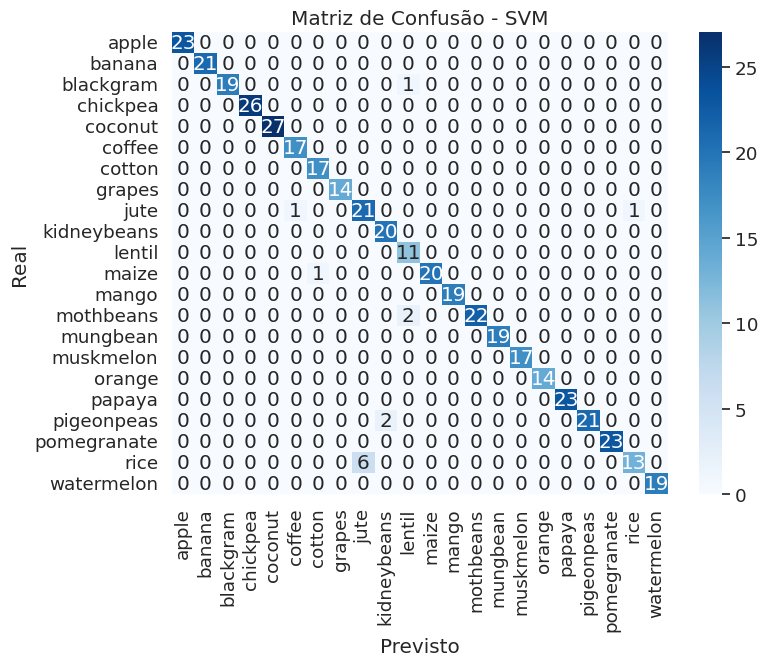

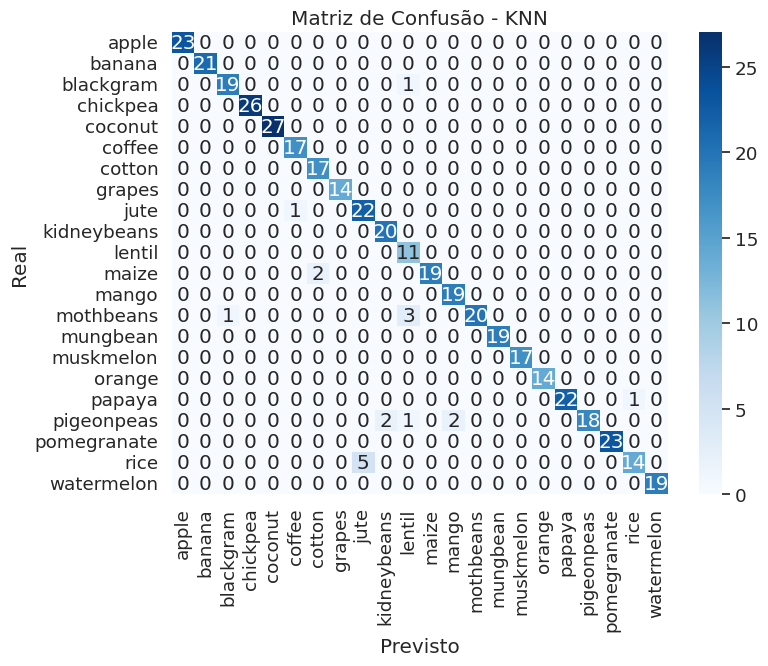

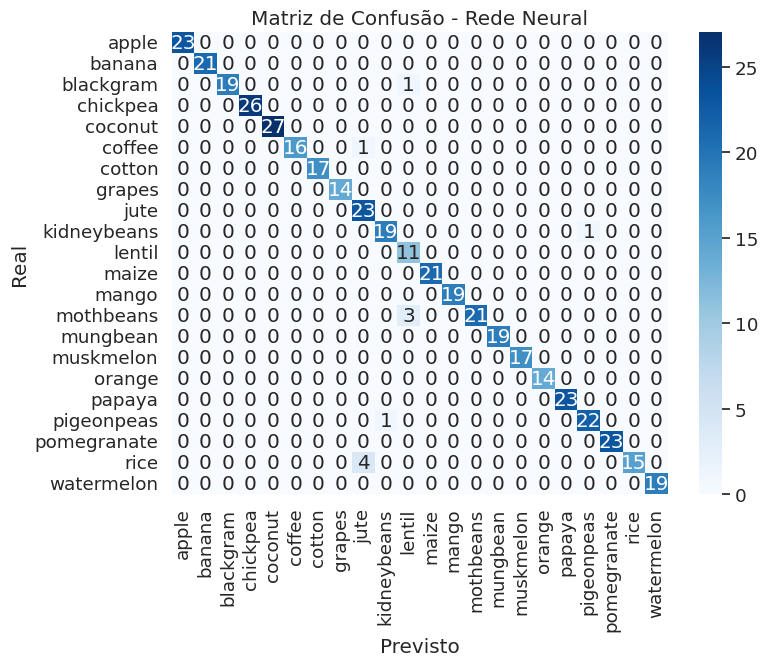

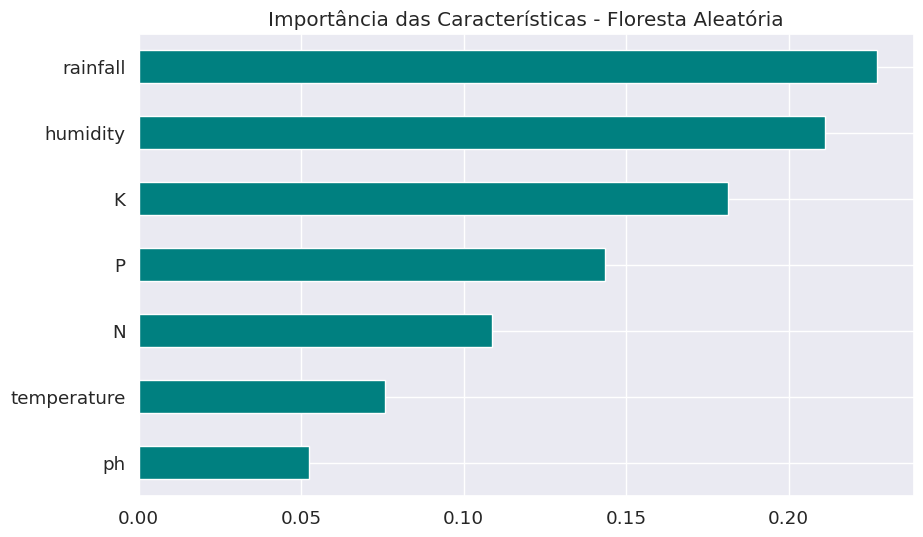

In [34]:
# Preparação dos dados
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir e treinar modelos
models = {
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Floresta Aleatória': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Rede Neural': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Avaliar modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\nDesempenho do {name}:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matriz de confusão
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.savefig(f'modelo_mc_{name.lower().replace(" ", "_")}.png')

# Análise da importância das características com Floresta Aleatória
rf_model = models['Floresta Aleatória']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title('Importância das Características - Floresta Aleatória')



### Análise de Modelagem
- **Validação Cruzada**: Floresta Aleatória mantém alta acurácia (média > 0.95), confirmando robustez.
- **Importância das Características**: Temperatura e umidade são os principais preditores, seguidos por precipitação.

## Conclusão

Principais descobertas:
1. Diferentes culturas mostram requisitos distintos para nutrientes do solo e condições climáticas
2. O classificador Floresta Aleatória alcançou o melhor desempenho preditivo
3. Temperatura e umidade são fortes indicadores para adequação da cultura

Limitações e Trabalhos Futuros:
- Considerar dados temporais para efeitos sazonais
- Incorporar fatores ambientais adicionais
- Explorar oportunidades de engenharia de características

### Recomendações Práticas
Com base nos modelos, recomendamos:
- **Arroz**: Solos com alto N (>80) e precipitação elevada (>200 mm).
- **Milho**: Temperaturas moderadas (20-25°C) e pH neutro (6.0-7.0).
- **Café**: Umidade moderada (60-80%) e solos com K elevado (>40).